C:\Users\bgpa4\AppData\Local\Temp\ipykernel_22308\1056428570.py:53: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


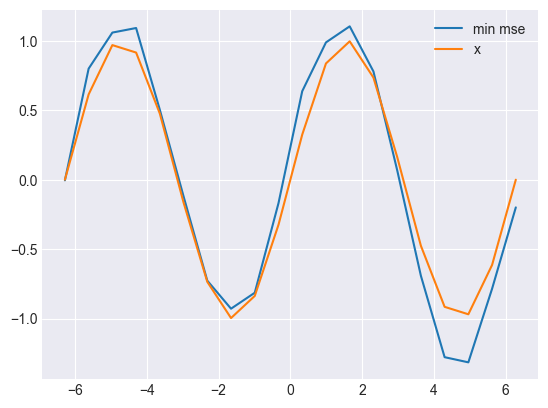

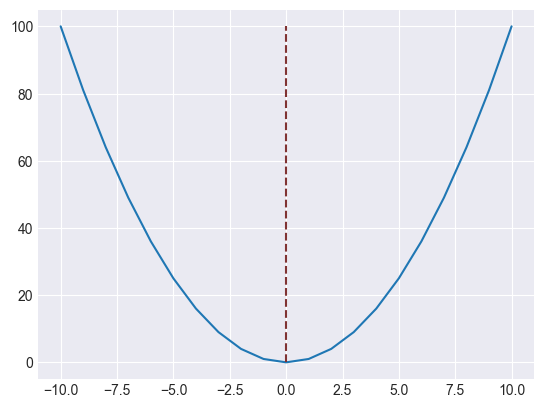

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def Slope(X, Y, axis=1):
    sorted_idx = np.argsort(X, axis=axis)
    X = np.take_along_axis(X, sorted_idx, axis=axis)
    Y = np.take_along_axis(Y, sorted_idx, axis=axis)
    if axis==1:
        delta_X = X[:,1:] - X[:,:-1]
        delta_Y = Y[:,1:] - Y[:,:-1]
    if axis==0:
        delta_X = X[1:] - X[:-1]
        delta_Y = Y[1:] - Y[:-1]
    return delta_Y / delta_X

def recovery_curve(x, slope, y0=0):
    delta_x = x[1:] - x[:-1]
    delta_y = delta_x*slope
    y = np.array([delta_y[:i].sum() for i in range(1, len(x), 1)]) + y0
    y = np.hstack((np.array([y0]), y))
    return y

def min_mse_y0(y, y_hat, x, slope_yhat):
    n = len(y)
    y_sum = np.sum(y)
    x0 = x[:-1]
    x1 = x[1:]
    x_diff = x1-x0
    k = np.arange(n-1, 0, -1)
    ss = sy * k * x_diff
    y0 = (x_sum - np.sum(ss)) / n
    return y0



n = 20
z = norm.rvs(loc=0, scale=0.2, size=n-1)
w = np.linspace(-2*np.pi, 2*np.pi, n)
x = np.sin(w)
sx = Slope(X=w, Y=x, axis=0)
sy = sx+z


x_sum = np.sum(x)
w0 = w[:-1]
w1 = w[1:]
w_diff = w1-w0
k = np.arange(n-1, 0, -1)
ss = sy * k * w_diff
y0 = (x_sum - np.sum(ss)) / n

y_min = recovery_curve(w, sy, y0=y0)
plt.style.use('seaborn-darkgrid')
plt.plot(w, y_min, label='min mse')
plt.plot(w, x, label = 'x')
plt.legend()
plt.show()


Y0 = np.arange(y0-10, y0+11, 1)
MSE = np.zeros(len(Y0))
for i in range(len(Y0)):
    y = recovery_curve(w, sy, y0=Y0[i])
    mse = np.sum((x-y) * (x-y)) / n
    MSE[i] = mse
plt.plot(Y0, MSE)
plt.plot([y0, y0], [np.min(MSE), np.max(MSE)], color=[0.5, 0.2, 0.2], ls='--')
plt.show()

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_16832\199510567.py:54: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


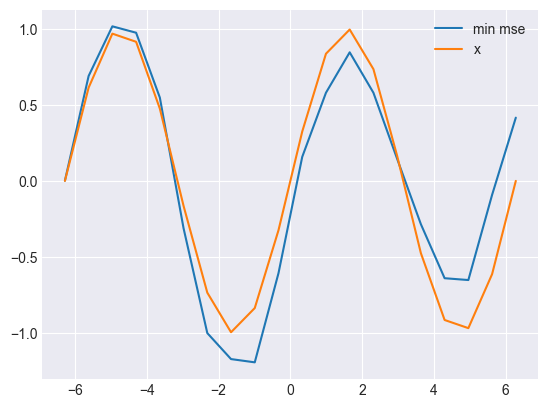

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_16832\199510567.py:61: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


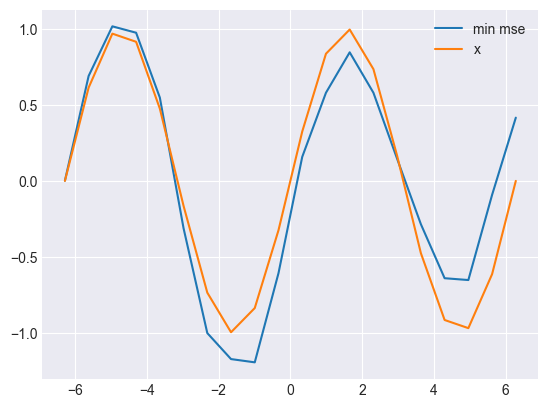

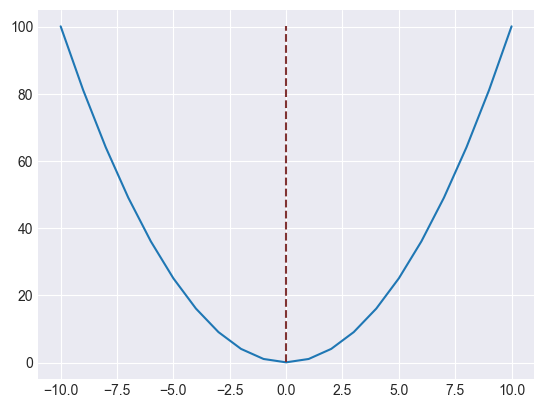

1.1474540475302653
1.1474540475302653


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def Slope(X, Y, axis=1):
    sorted_idx = np.argsort(X, axis=axis)
    X = np.take_along_axis(X, sorted_idx, axis=axis)
    Y = np.take_along_axis(Y, sorted_idx, axis=axis)
    if axis==1:
        delta_X = X[:,1:] - X[:,:-1]
        delta_Y = Y[:,1:] - Y[:,:-1]
    if axis==0:
        delta_X = X[1:] - X[:-1]
        delta_Y = Y[1:] - Y[:-1]
    return delta_Y / delta_X

def recovery_curve(x, slope, y0=0):
    delta_x = x[1:] - x[:-1]
    delta_y = delta_x*slope
    y = np.array([delta_y[:i].sum() for i in range(1, len(x), 1)]) + y0
    y = np.hstack((np.array([y0]), y))
    return y

def min_mse_y0(y, x, slope_yhat):
    n = len(y)
    y_sum = np.sum(y)
    x0 = x[:-1]
    x1 = x[1:]
    x_diff = x1-x0
    k = np.arange(n-1, 0, -1)
    ss = slope_yhat * k * x_diff
    y0 = (y_sum - np.sum(ss)) / n
    return y0

def minSSE_recovery(y, x, slope_yhat):
    y0 = min_mse_y0(y, x, slope_yhat)
    y_hat = recovery_curve(x, slope=slope_yhat, y0=y0)
    SSE = np.sum((y - y_hat) * (y - y_hat))
    return y_hat, SSE



n = 20
z = norm.rvs(loc=0, scale=0.2, size=n-1)
w = np.linspace(-2*np.pi, 2*np.pi, n)
x = np.sin(w)
sx = Slope(X=w, Y=x, axis=0)
sy = sx+z



y0 = min_mse_y0(y=x, x=w, slope_yhat=sy)

y_min = recovery_curve(w, sy, y0=y0)
plt.style.use('seaborn-darkgrid')
plt.plot(w, y_min, label='min mse')
plt.plot(w, x, label = 'x')
plt.legend()
plt.show()

y_min, SSE = minSSE_recovery(y=x, x=w, slope_yhat=sy)
plt.style.use('seaborn-darkgrid')
plt.plot(w, y_min, label='min mse')
plt.plot(w, x, label = 'x')
plt.legend()
plt.show()


Y0 = np.arange(y0-10, y0+11, 1)
MSE = np.zeros(len(Y0))
for i in range(len(Y0)):
    y = recovery_curve(w, sy, y0=Y0[i])
    mse = np.sum((x-y) * (x-y)) / n
    MSE[i] = mse
plt.plot(Y0, MSE)
plt.plot([y0, y0], [np.min(MSE), np.max(MSE)], color=[0.5, 0.2, 0.2], ls='--')
plt.show()

print(SSE)
y_min = recovery_curve(w, sy, y0=min_mse_y0(y=x, x=w, slope_yhat=sy))
print(np.sum((y_min-x) * (y_min-x)))